### Midterm Project
### Heart Disease Classifier

__Description__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mutual_info_score

import pickle

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


__Dataset features description__\
•	Age (in years)\
•	Sex (Gender: 0-male, 1-female)\
•	cp – chest pain type (values 0-3)\
•	trestbps – resting blood pressure (in mm Hg)\
•	chol – serum cholesterol (in mm/dl)\
•	fbs – fasting blood sugar > 120 mg/dl (1:true, 0:false)\
•	restecg – resting electrocardiographic results (values 0-2)\
•	thalack – max heart rate\
•	exang – exercise induced angina (1:yes, 0:no)\
•	oldpeak – ST depression induced by exercise relative to rest\
•	slope – the slope of the peak exercise ST segment (values 0-2)\
•	ca – number of major vessels(0-4) coloured by flourosopy\
•	thal (0:normal, 1:fixed_defect, 2:reversable_defect)\
and condition which is the label / target.

In [47]:
df.shape

(297, 14)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [49]:
df.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

In [4]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['sex', 'fbs', 'exang', 'condition', 'cp', 'restecg', 'slope', 'ca', 'thal']

cat_map_to_string = {
    'sex'       : ['female', 'male'],
    'fbs'       : ['false', 'true'],
    'exang'     : ['no', 'yes'], 
    'condition' : ['no_disease', 'disease'], 
    'cp'        : ["typical_angina", "atypical_angina", "non_anginal_pain", "asymtomatic"], 
    'restecg'   : ['normal', 'st-t_wave_abnormality', 'left_ventricular_hypertrophy'], 
    'slope'     : ['upsloping', 'flat', 'downsloping'], 
    'ca'        : ['zero', 'one', 'two', 'three'], 
    'thal'      : ['normal', 'fixed_defect', 'reversable_defect']
}

In [5]:
for cat in categorical:
    c = cat_map_to_string[cat]
    df[cat] = df[cat].map(lambda x: c[x])

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,male,typical_angina,160,234,true,left_ventricular_hypertrophy,131,no,0.1,flat,one,normal,no_disease
1,69,female,typical_angina,140,239,false,normal,151,no,1.8,upsloping,two,normal,no_disease
2,66,female,typical_angina,150,226,false,normal,114,no,2.6,downsloping,zero,normal,no_disease
3,65,male,typical_angina,138,282,true,left_ventricular_hypertrophy,174,no,1.4,flat,one,normal,disease
4,64,male,typical_angina,110,211,false,left_ventricular_hypertrophy,144,yes,1.8,flat,zero,normal,no_disease


__EDA__

male      201
female     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='Count'>

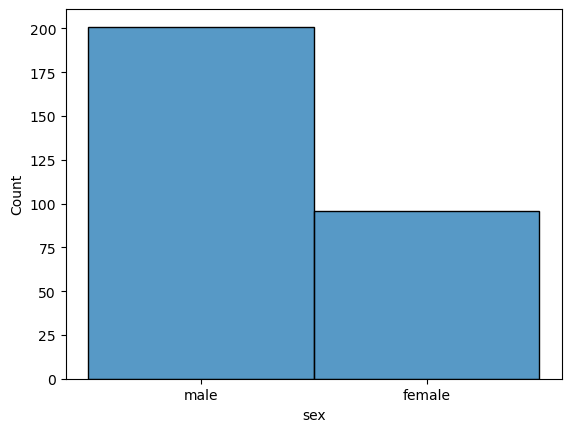

In [53]:
display(df.sex.value_counts())
sns.histplot(df.sex)

<AxesSubplot:xlabel='sex'>

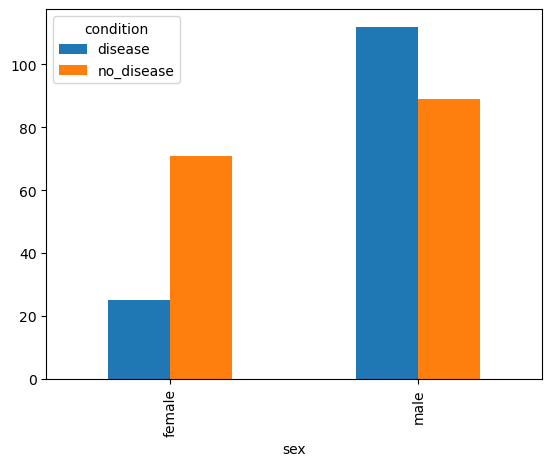

In [58]:
pd.crosstab(df.sex, df.condition).plot(kind='bar')

In [54]:
for c in categorical:
    display(df[c].value_counts())
    print('-----'*10)

male      201
female     96
Name: sex, dtype: int64

--------------------------------------------------


false    254
true      43
Name: fbs, dtype: int64

--------------------------------------------------


no     200
yes     97
Name: exang, dtype: int64

--------------------------------------------------


no_disease    160
disease       137
Name: condition, dtype: int64

--------------------------------------------------


asymtomatic         142
non_anginal_pain     83
atypical_angina      49
typical_angina       23
Name: cp, dtype: int64

--------------------------------------------------


normal                          147
left_ventricular_hypertrophy    146
st-t_wave_abnormality             4
Name: restecg, dtype: int64

--------------------------------------------------


upsloping      139
flat           137
downsloping     21
Name: slope, dtype: int64

--------------------------------------------------


zero     174
one       65
two       38
three     20
Name: ca, dtype: int64

--------------------------------------------------


normal               164
reversable_defect    115
fixed_defect          18
Name: thal, dtype: int64

--------------------------------------------------


In [55]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.54,9.05,29.0,48.0,56.0,61.0,77.0
trestbps,297.0,131.69,17.76,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.35,52.00,126.0,211.0,243.0,276.0,564.0
thalach,297.0,149.60,22.94,71.0,133.0,153.0,166.0,202.0
oldpeak,297.0,1.06,1.17,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='age', ylabel='Count'>

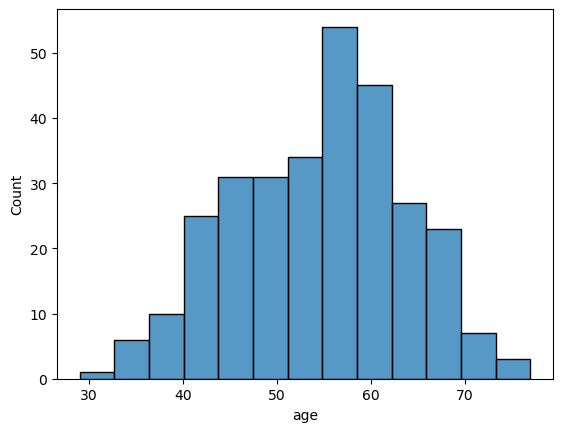

In [56]:
sns.histplot(df.age)

In [6]:
df.condition = df.condition.map({'no_disease':0, 'disease':1})
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

<AxesSubplot:>

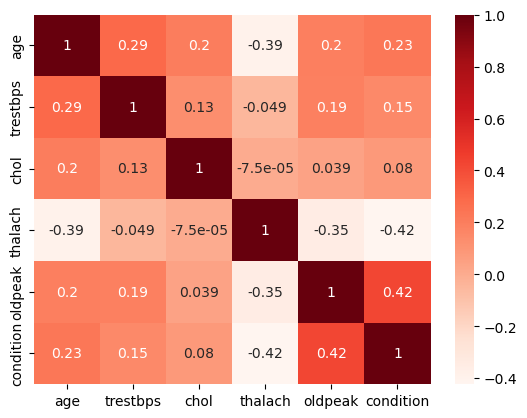

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='Reds')

__Appying MinMax Scaler__

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2
condition,297.0,0.461279,0.499340,0.0,0.0,0.0,1.0,1.0


In [8]:
for n in numerical:
    df[n] = MinMaxScaler().fit_transform(df[n].values.reshape(-1, 1))


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,0.532127,0.188536,0.0,0.395833,0.562500,0.666667,1.0
trestbps,297.0,0.355600,0.167574,0.0,0.245283,0.339623,0.433962,1.0
chol,297.0,0.277055,0.118716,0.0,0.194064,0.267123,0.342466,1.0
thalach,297.0,0.599995,0.175126,0.0,0.473282,0.625954,0.725191,1.0
oldpeak,297.0,0.170251,0.188084,0.0,0.000000,0.129032,0.258065,1.0
condition,297.0,0.461279,0.499340,0.0,0.000000,0.000000,1.000000,1.0


__splitting and handling categorical values__

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=49)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=49)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.condition.values
y_val = df_val.condition.values
y_test = df_test.condition.values

del df_train['condition']
del df_val['condition']
del df_test['condition']

In [11]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [91]:
X_train.shape

(177, 28)

In [12]:
full_train_dicts = df_full_train.to_dict(orient='records')
X_full_train = dv.transform(full_train_dicts)
y_full_train = df_full_train.condition.values

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [14]:
model_LR = LogisticRegression(random_state=49)
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=49)

In [15]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model_LR.predict_proba(X_val)[:, 1]

In [17]:
def evaluate_model(model, x_test, y_test, label='model'):

    y_pred= model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print('Accuracy:', acc)
    print('Precision:', prec)
    print('Recall:', rec)
    print('F1 Score:', f1) 
    print('Confusion Matrix:\n', cm)

    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], label='random')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

    print('Area Under Curve:', auc)
    
    


__Logistic Regression__

Accuracy: 0.8333333333333334
Precision: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002
Confusion Matrix:
 [[30  5]
 [ 5 20]]
Area Under Curve: 0.864


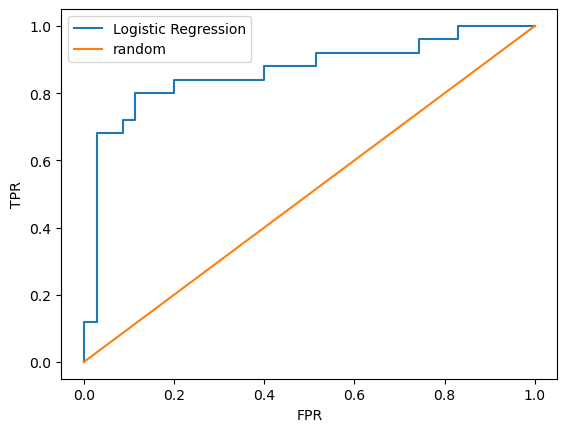

In [97]:
evaluate_model(model_LR, X_val, y_val, label='Logistic Regression')

In [99]:
max_iter_values = list(range(100, 1001, 100))
scores = []
for max_iter in max_iter_values:
    model = LogisticRegression(max_iter=max_iter, random_state=49)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, y_pred)
    scores.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


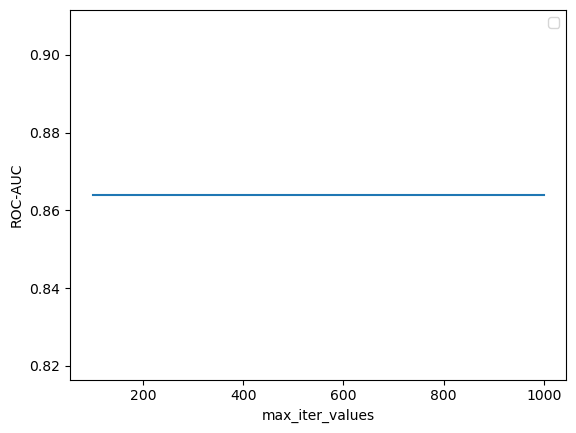

In [100]:
plt.plot(max_iter_values, scores)
plt.xlabel('max_iter_values')
plt.ylabel('ROC-AUC')
plt.legend()

In [116]:
C_values = [0.001, 0.003,  0.01, 0.03, 0.1,0.3, 1, 10, 25]
scores = []

for C in C_values:
    model = LogisticRegression(C=C, random_state=49)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, y_pred)
    scores.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


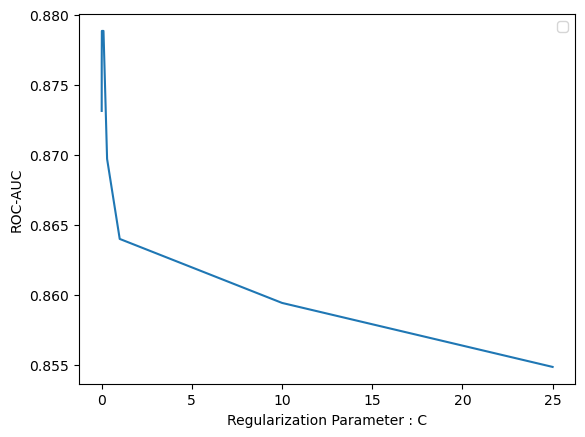

In [117]:
plt.plot(C_values, scores)
plt.xlabel('Regularization Parameter : C')
plt.ylabel('ROC-AUC')
plt.legend()

In [118]:
C_values[
    np.argmax(scores)
]

0.01

So C regularization parameter's value is 0.01

In [120]:

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []

for S in solvers:
    model = LogisticRegression(C=0.01,solver=S, random_state=49)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, y_pred)
    scores.append(score)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


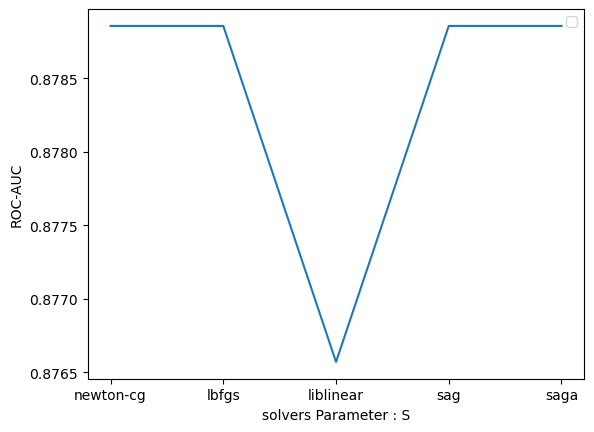

In [121]:
plt.plot(solvers, scores)
plt.xlabel('solvers Parameter : S')
plt.ylabel('ROC-AUC')
plt.legend()

Accuracy: 0.8166666666666667
Precision: 0.8846153846153846
Recall: 0.7419354838709677
F1 Score: 0.8070175438596492
Confusion Matrix:
 [[26  3]
 [ 8 23]]
Area Under Curve: 0.9054505005561736


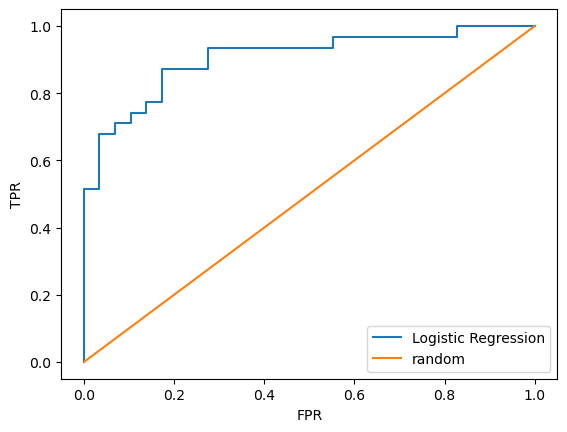

In [18]:
model_LR_1 = LogisticRegression(C=0.01, random_state=49)
model_LR_1.fit(X_full_train, y_full_train)

evaluate_model(model_LR_1, X_test, y_test, label='Logistic Regression')

In [20]:
output_file = 'model_lr.bin'
with open(output_file, 'wb') as f_out:
    pickle.dump(model_LR_1, f_out)

print(f'the model is saved to {output_file}')

the model is saved to model_lr.bin


__knn__

In [21]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f83b514ca60>
Traceback (most recent call last):
  File "/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_i

Accuracy: 0.8666666666666667
Precision: 0.8695652173913043
Recall: 0.8
F1 Score: 0.8333333333333333
Confusion Matrix:
 [[32  3]
 [ 5 20]]
Area Under Curve: 0.8594285714285714


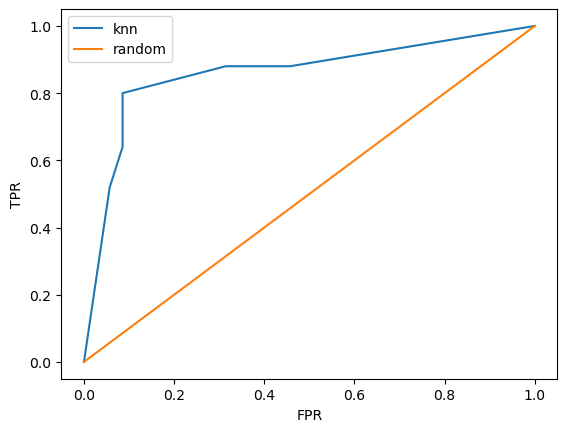

In [22]:
evaluate_model(model_knn, X_val, y_val, label='knn')

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f83a12a97e0>
Traceback (most recent call last):
  File "/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_i

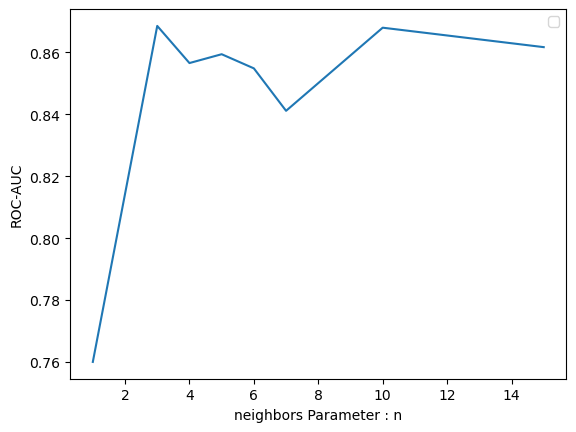

In [31]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 10, 15]
scores = []

for n in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, y_pred)
    scores.append(score)

plt.plot(n_neighbors, scores)
plt.xlabel('neighbors Parameter : n')
plt.ylabel('ROC-AUC')
plt.legend()

In [36]:
np.max(scores)

0.8685714285714285

__Decision Trees__

In [17]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.6833333333333333
Precision: 0.6153846153846154
Recall: 0.64
F1 Score: 0.6274509803921569
Confusion Matrix:
 [[25 10]
 [ 9 16]]
Area Under Curve: 0.6771428571428572


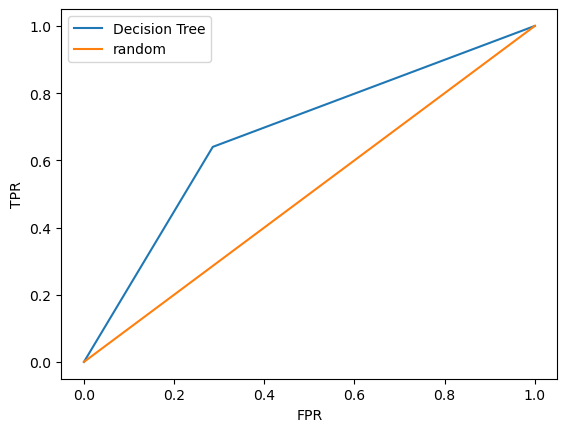

In [18]:
evaluate_model(model_DT, X_val, y_val, label='Decision Tree')

In [37]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8182857142857144

In [38]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- cp=asymtomatic <= 0.50
|   |--- ca=zero <= 0.50
|   |   |--- slope=flat <= 0.50
|   |   |   |--- class: 0
|   |   |--- slope=flat >  0.50
|   |   |   |--- class: 1
|   |--- ca=zero >  0.50
|   |   |--- oldpeak <= 0.27
|   |   |   |--- class: 0
|   |   |--- oldpeak >  0.27
|   |   |   |--- class: 0
|--- cp=asymtomatic >  0.50
|   |--- ca=zero <= 0.50
|   |   |--- trestbps <= 0.14
|   |   |   |--- class: 0
|   |   |--- trestbps >  0.14
|   |   |   |--- class: 1
|   |--- ca=zero >  0.50
|   |   |--- thal=reversable_defect <= 0.50
|   |   |   |--- class: 0
|   |   |--- thal=reversable_defect >  0.50
|   |   |   |--- class: 1



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


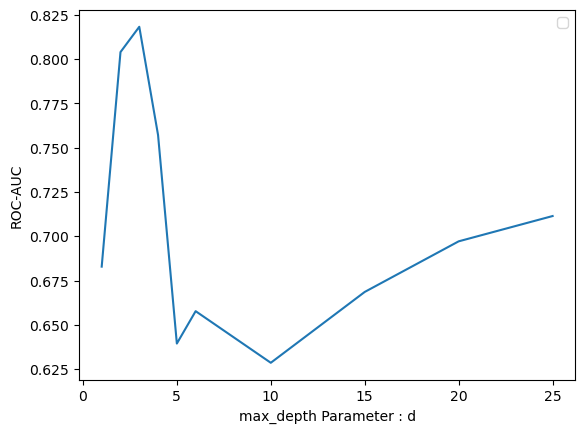

In [42]:
max_depth_values = [1, 2, 3, 4, 5, 6, 10, 15, 20, 25, None]
scores = []

for d in max_depth_values:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, y_pred)
    scores.append(score)

plt.plot(max_depth_values, scores)
plt.xlabel('max_depth Parameter : d')
plt.ylabel('ROC-AUC')
plt.legend()

In [43]:
max_depth_values[
    np.argmax(scores)
]

3

In [58]:
max_depth = [1, 2, 3, 4, 5, 6, 10, 15, 20, 25, None]
min_samples_leaf = [1, 2, 5, 10, 15, 20, 50]
scores = []

for d in max_depth:
    for s in min_samples_leaf:
        model = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s, random_state=49)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_val)[:, 1]
        score = roc_auc_score(y_val, y_pred)
        scores.append((d, s, score))


In [59]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
18,3.0,15,0.869143
53,15.0,15,0.860000
74,NaN,15,0.860000
60,20.0,15,0.860000
46,10.0,15,0.860000
...,...,...,...
63,25.0,1,0.677143
42,10.0,1,0.677143
49,15.0,1,0.677143
56,20.0,1,0.677143


In [60]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                   \
max_depth           NaN   1.0    2.0    3.0    4.0    5.0    6.0    10.0   
min_samples_leaf                                                           
1                 0.677  0.683  0.804  0.818  0.770  0.654  0.686  0.677   
2                 0.707  0.683  0.804  0.818  0.758  0.717  0.707  0.707   
5                 0.815  0.683  0.804  0.814  0.801  0.815  0.815  0.815   
10                0.833  0.683  0.804  0.828  0.833  0.833  0.833  0.833   
15                0.860  0.683  0.804  0.869  0.860  0.860  0.860  0.860   
20                0.825  0.683  0.804  0.837  0.825  0.825  0.825  0.825   
50                0.683  0.683  0.683  0.683  0.683  0.683  0.683  0.683   

                                       
max_depth          15.0   20.0   25.0  
min_samples_leaf                       
1                 0.677  0.677  0.677  
2                 0.707  0.707  0.707  
5                 0.815  0.815  0.815  
10                0.833  0.833  0.833  
15                0.860  0.860  0.860  
20                0.825  0.825  0.825  
50                0.683  0.683  0.683

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

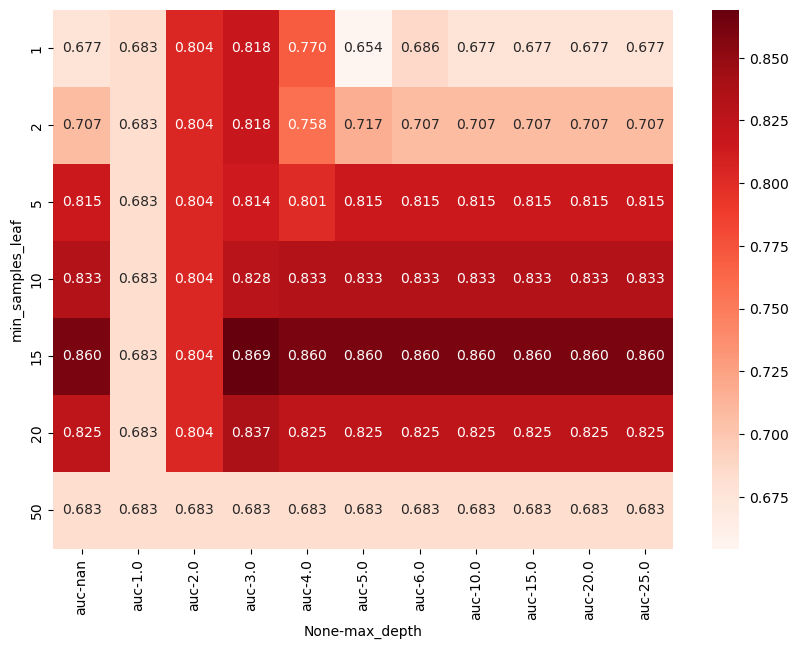

In [61]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_scores_pivot, annot=True, cmap='Reds', fmt='.3f')

In [62]:
min_samples_leaf = 15
max_depth = 3

dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=49)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8691428571428572

__Random Forest__

In [63]:
model_rf = RandomForestClassifier(n_estimators=10, random_state=49)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8662857142857143

In [84]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=49)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

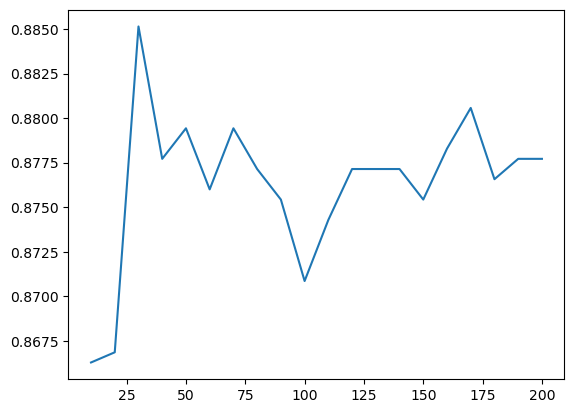

In [85]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [86]:
df_scores.n_estimators[
    np.argmax(df_scores.auc)
]

30

In [87]:
scores = []
for d in [3, 4, 5, 6]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=49)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])

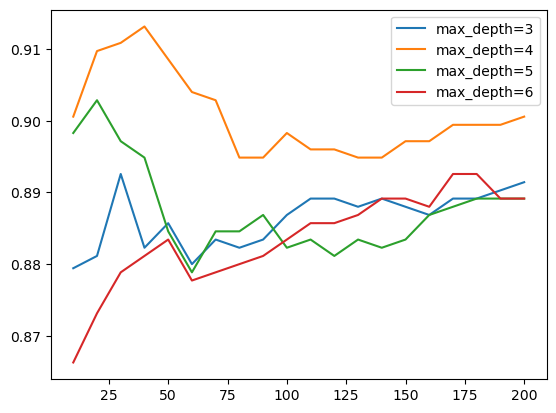

In [88]:
for d in [3, 4, 5, 6]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%s'%d)

plt.legend()

In [132]:
max_depth = 4


scores = []
for s in [1, 2, 3, 4, 5]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=49)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

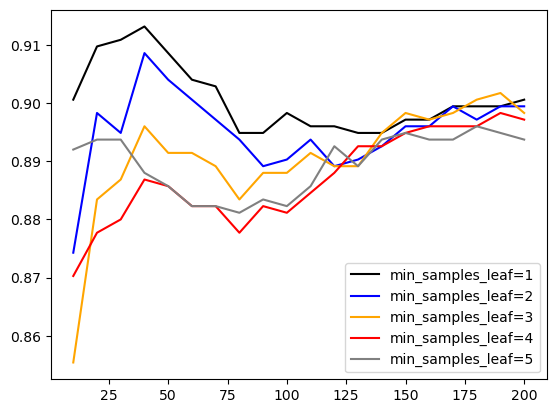

In [133]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])

colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 2, 3, 4, 5]
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
                    color=col,
                     label='min_samples_leaf=%s'%s)

plt.legend()

In [134]:
df_subset = df_scores[df_scores.min_samples_leaf == 1]
df_subset.n_estimators[
    np.argmax(df_subset.auc)
]

40

In [135]:
max(df_subset.auc)

0.913142857142857

In [21]:
max_depth = 4
min_samples_leaf = 1
n_estimators = 40
model_rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth, 
                            min_samples_leaf=min_samples_leaf, 
                            random_state=49)
model_rf.fit(X_full_train, y_full_train)

y_pred = model_rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8854282536151279

Accuracy: 0.7833333333333333
Precision: 0.8
Recall: 0.7741935483870968
F1 Score: 0.7868852459016393
Confusion Matrix:
 [[23  6]
 [ 7 24]]
Area Under Curve: 0.8854282536151279


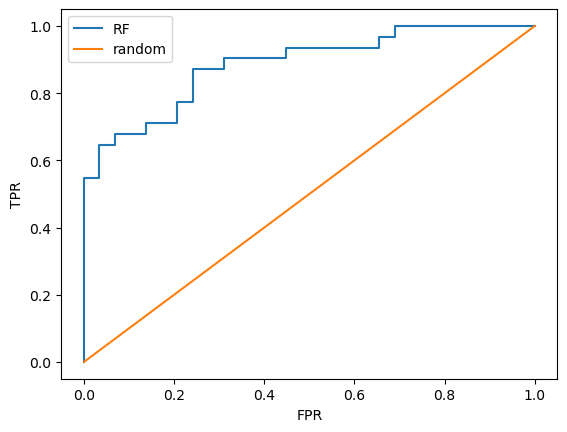

In [22]:
evaluate_model(model_rf, X_test, y_test, label='RF')

In [140]:
output_file = 'model_rf.bin'
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model_rf), f_out)

print(f'The model is saved to {output_file}')

The model is saved to model_rf.bin
